In [2]:
## Import necessary packages ##
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Load the data ##
df = pd.read_csv("../Final Project/Datasets/encounters-by-facility_2012-2023_20240702.csv")

In [6]:
## Convert year to datetime ##
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [8]:
## Create new column 'visit_type' based on 'type' column ##
df['visit_type'] = df['type'].map({'ED_Admit': 'Admission', 'ED_Visit': 'Visit'})

In [10]:
## Group by year and visit type, then sum the # of counts ##
df_grouped = df.groupby(['year', 'visit_type'])['count'].sum().unstack()

## Plot 1: Total ED Visits Over Time 

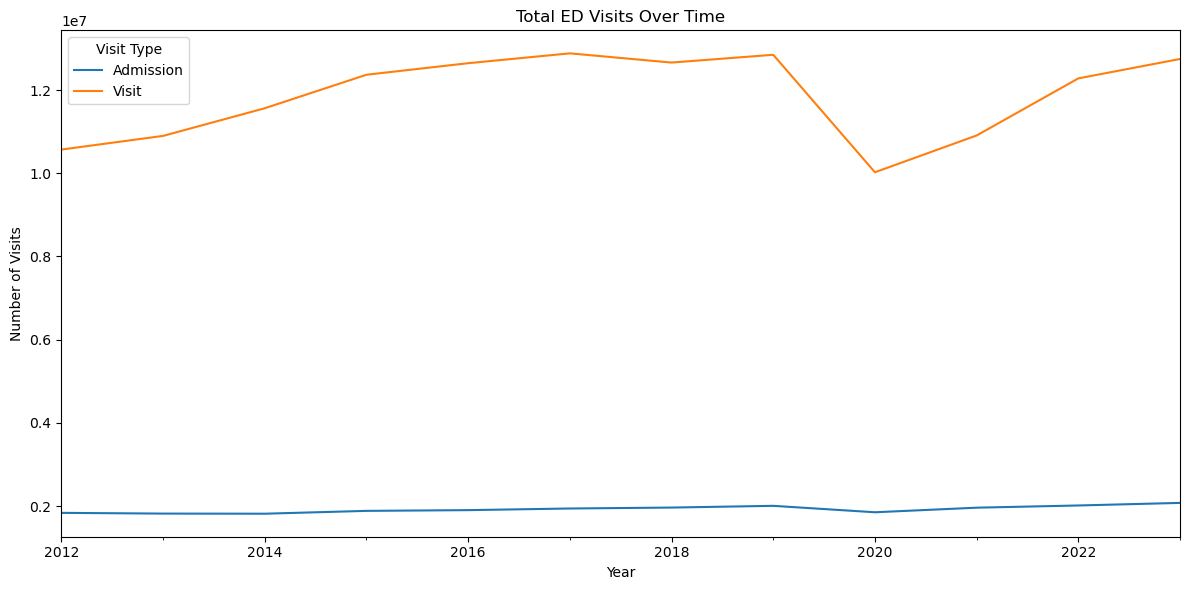

In [13]:
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='line', ax=plt.gca())
plt.title('Total ED Visits Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.legend(title='Visit Type')
plt.tight_layout()
plt.savefig('total_ed_visits_over_time.png')
plt.show()

## Plot 2: Top 10 ED Visits by Facility

In [16]:
top_10_facilities = df.groupby('facility_name')['count'].sum().nlargest(10).index
df_top_10 = df[df['facility_name'].isin(top_10_facilities)]

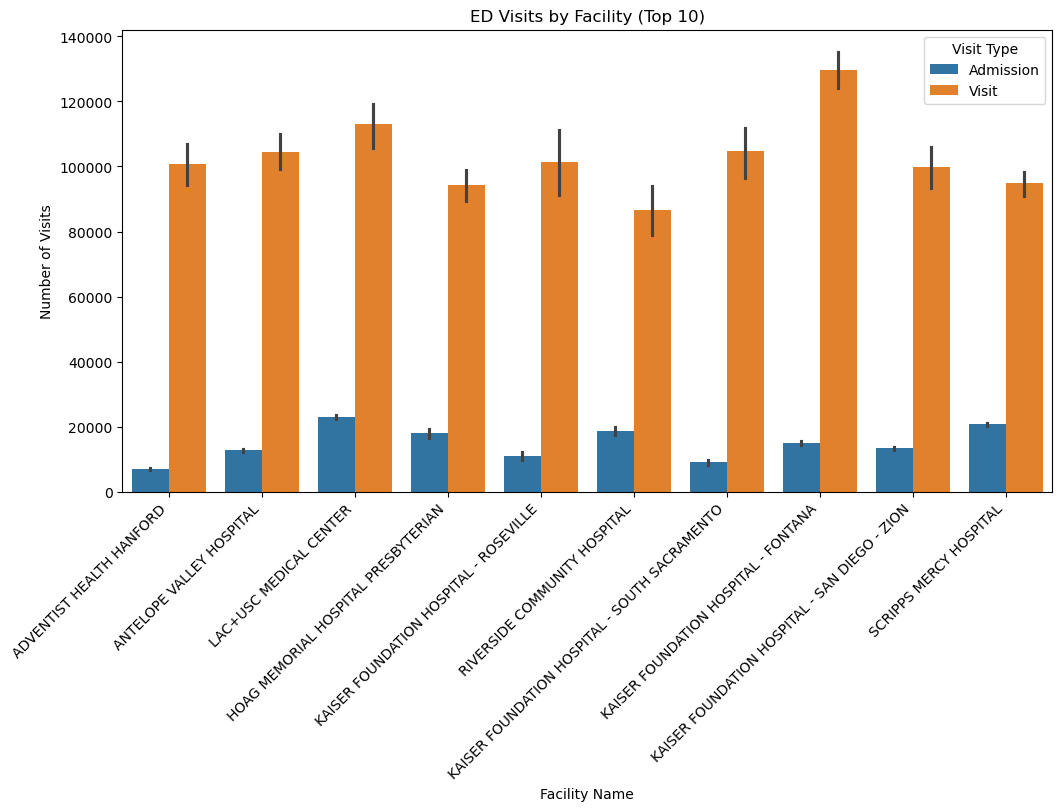

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='facility_name', y='count', hue='visit_type', data=df_top_10)
plt.title('ED Visits by Facility (Top 10)')
plt.xlabel('Facility Name')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Visit Type')
plt.savefig('ED_visits_by_facility_top_10.png')
plt.show()

## Plot 3: ED Visit Types Distribution:

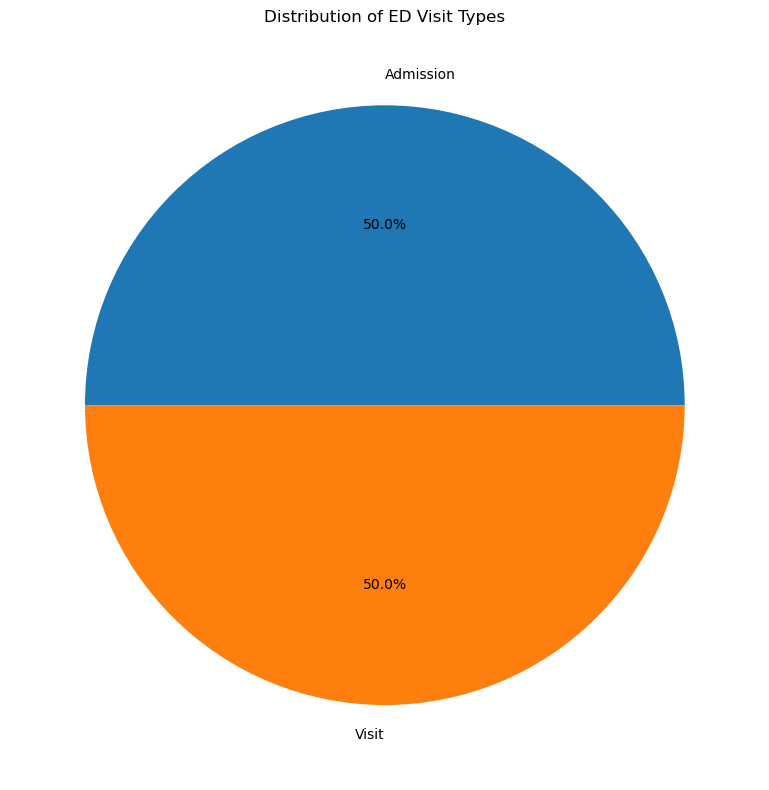

In [21]:
plt.figure(figsize=(8, 8))
df['visit_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of ED Visit Types')
plt.ylabel('')
plt.tight_layout()
plt.savefig('ED_visit_types_distribution.png')
plt.show()

## Plot 4: ED Visits by County

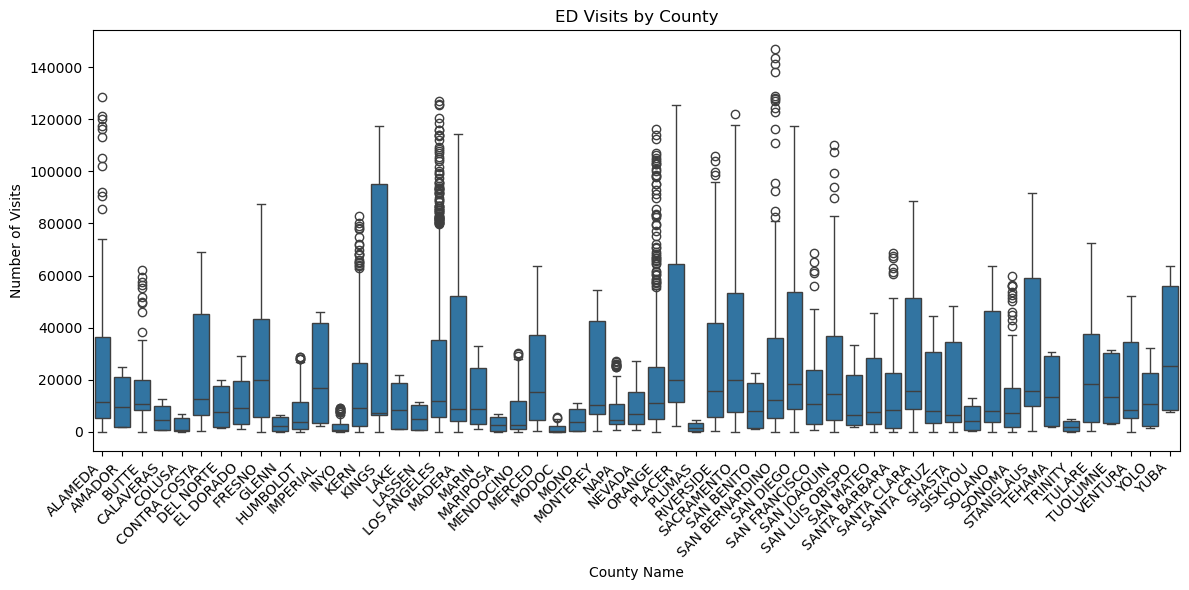

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='county_name', y='count', data=df)
plt.title('ED Visits by County')
plt.xlabel('County Name')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('ed_visits_by_county.png')
plt.show()

## Interactive Dashboard

In [27]:
## Import necessary packages ##
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

/var/folders/56/5k6_y0s97wz_11139c0bg8340000gn/T/ipykernel_7833/3491289295.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/56/5k6_y0s97wz_11139c0bg8340000gn/T/ipykernel_7833/3491289295.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [35]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Emergency Department Visits Dashboard"),
    
    dcc.Graph(id='total-visits-graph'),
    
    dcc.Dropdown(
        id='facility-dropdown',
        options=[{'label': i, 'value': i} for i in df['facility_name'].unique()],
        value=df['facility_name'].unique()[0]
    ),
    
    dcc.Graph(id='facility-visits-graph')
])

@app.callback(
    Output('total-visits-graph', 'figure'),
    Input('facility-dropdown', 'value')
)
def update_total_visits_graph(selected_facility):
    filtered_df = df[df['facility_name'] == selected_facility]
    fig = px.line(filtered_df, x='year', y='count', color='type',
                  title=f'Total ED Visits Over Time - {selected_facility}')
    return fig

@app.callback(
    Output('facility-visits-graph', 'figure'),
    Input('facility-dropdown', 'value')
)
def update_facility_visits_graph(selected_facility):
    filtered_df = df[df['facility_name'] == selected_facility]
    fig = px.bar(filtered_df, x='year', y='count', color='type',
                 title=f'ED Visits by Type - {selected_facility}')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)